<a href="https://colab.research.google.com/github/Finlay-J/VGsales-prediction/blob/main/VideoGameSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Global Video Game Sales with Machine Learning

Can we predict how well a video game will sell globally based on its genre, platform, publisher, and regional performance?

This project uses game sales data to build a regression model that estimates global sales, helping us understand what features drive commercial success.


In [5]:
!pip install xgboost
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('vgsales.csv')



df.info()
df.describe()
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,36
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


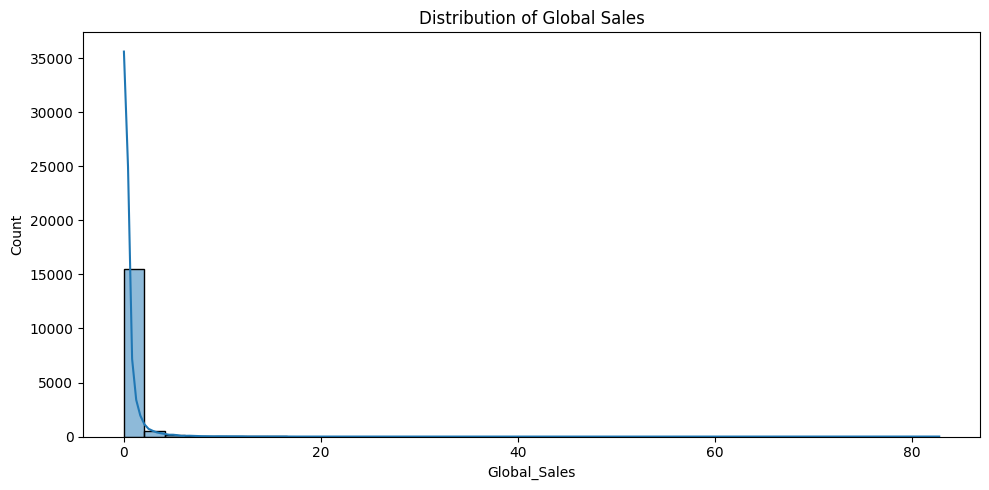

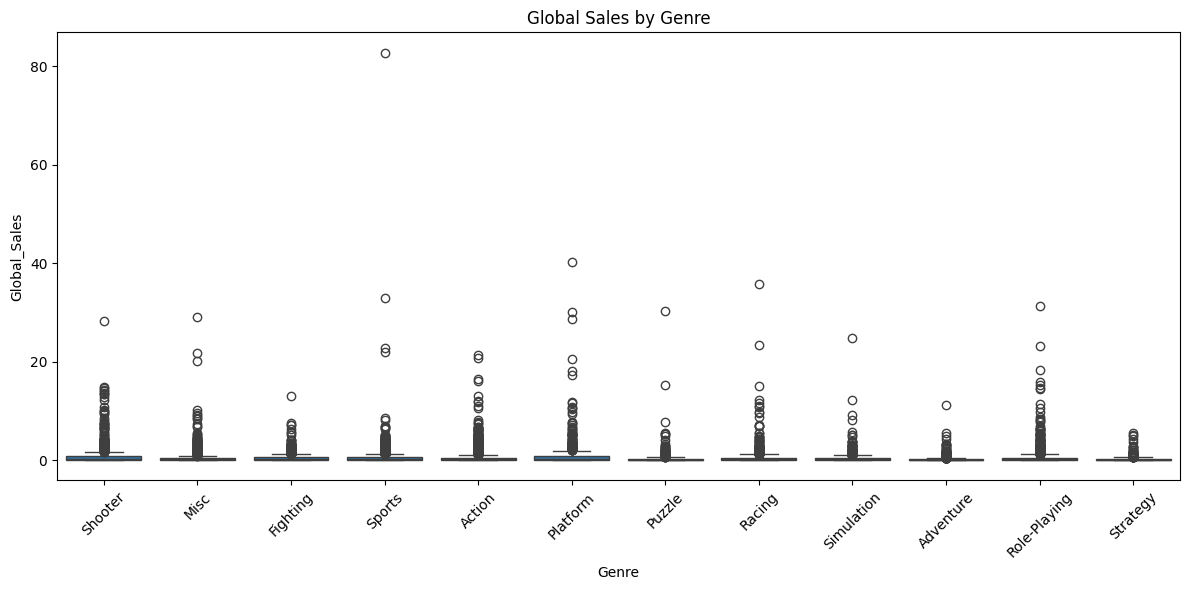

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Global_Sales'], bins=40, kde=True)
plt.title("Distribution of Global Sales")
plt.tight_layout()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Global_Sales')
plt.xticks(rotation=45)
plt.title("Global Sales by Genre")
plt.tight_layout()
plt.show()


In [7]:
# CLEAN AND PREPARE DATA


cat_cols = df.select_dtypes(include='object').columns
print("Encoding:", cat_cols)

# Encode each column
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



Encoding: Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')


In [8]:


X = df.drop(columns=['Global_Sales'])
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#Train
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

MSE: 0.7784602008347237
R²: 0.7995062515195663


## Results
Achieved an MSE of 0.77 and R² of 0.79, indicating reasonable predictive power.

## Conclusion
Regional sales are strong predictors, while genre and platform also matter. Future work includes hyperparameter tuning and external data integration.

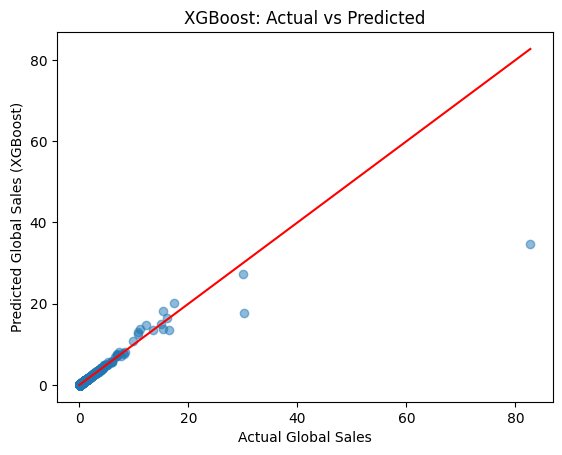

In [14]:


plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales (XGBoost)")
plt.title("XGBoost: Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()



